# Polarization math:  Jones vectors and matrices
Using Jones vectors and matrices to look at polarization processing by optical elements.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
%matplotlib inline
plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [12, 6]

First, let's illustrate how to build matrices and column vectors in numpy.

In [2]:
# 2 x 2 matrix
z = np.array([[1,2],[3,4]])
z

array([[1, 2],
       [3, 4]])

In [3]:
# column vector
a = np.array([[0],[1]])
a

array([[0],
       [1]])

Use "matmul" to multiply an array and a vector.

In [4]:
np.matmul(z,a)

array([[2],
       [4]])

# Jones matrix example
Define the input polarization with a Jones vector, and define a polarizer with a Jones matrix.

Then, use a rotation matrix to rotate the input Ein before it gets to the polarizer, and measure the intensity that gets through the polarizer as a function of the input polarization angle.

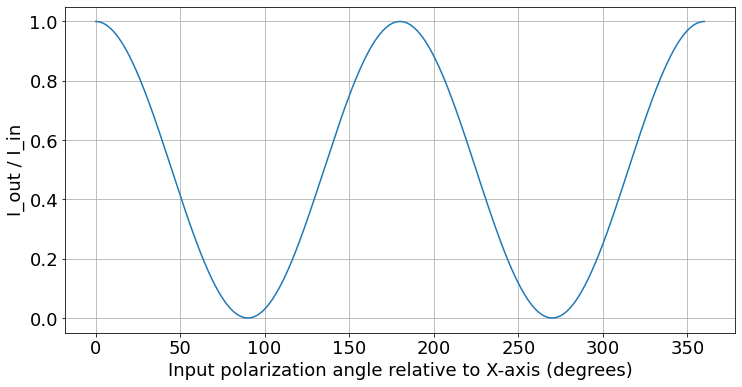

In [5]:
Ein = np.array([[1],[0]])   # input polarized in x direction
P1 = np.array([[1,0],[0,0]])  # Jones matrix for a horizontal polarizer (x direction)

thetavec_deg = np.linspace(0,360,1000)
thetavec = thetavec_deg*np.pi/180.
Ivec = np.array([])

# Loop over input polarization angles.
for theta in thetavec:
    
    # Build the rotation matrix
    sint = np.sin(theta)
    cost = np.cos(theta)
    R = np.array([[cost, -sint],[sint, cost]])
    
    # Rotate Ein
    E1 = np.matmul(R,Ein)
    
    # Run E1 into the polarizer described by M1
    E2 = np.matmul(P1,E1)
    
    # Calculate the intensity
    I = np.vdot(E2,E2)
    
    # Save for plotting
    Ivec = np.append(Ivec,I)

# Make a plot
plt.plot(thetavec_deg,Ivec)
plt.xlabel('Input polarization angle relative to X-axis (degrees)')
plt.ylabel('I_out / I_in')
plt.grid()

# 2 polarizers, one rotating
Here we have an input x-polarized beam, which hits a rotating polarizer, after which the beam passes through a fixed y-polarizer.

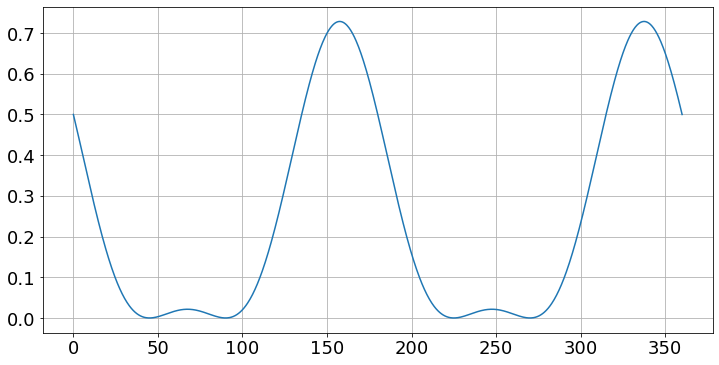

In [7]:
Ein = np.array([[1],[0]])   # input polarized in x direction
P1 = np.array([[1,0],[0,0]])  # Jones matrix for a horizontal polarizer (x direction)
#P2 = np.array([[0,0],[0,1]])  # Jones matrix for a horizontal polarizer
P2 = 0.5*np.array([[1,1],[1,1]]) # Jones matrix for a 45deg polarizer

thetavec_deg = np.linspace(0,360,1000)
thetavec = thetavec_deg*np.pi/180.
Ivec = np.array([])

for theta in thetavec:
    
    # Build rotation matrix and its inverse.
    sint = np.sin(theta)
    cost = np.cos(theta)
    R = np.array([[cost, -sint],[sint, cost]])
    Rinv = np.array([[cost, sint],[-sint, cost]])
    
    # Run Ein through the rotated polarizer    
    Erot = np.matmul(R,Ein)   #   Rotate E into basis of polarizer, 
    E2 = np.matmul(P1,Erot)   #   go through polarizer, 
    E2o = np.matmul(Rinv,E2)  #   rotate E back into original basis.
    
    # Run resulting E through the final polarizer
    E3 = np.matmul(P2,E2o)
    
    # Calculate intensity
    I = np.vdot(E3,E3)
    Ivec = np.append(Ivec,I)

plt.plot(thetavec_deg,Ivec)
plt.grid()
    
    

In [ ]:
Ein = np.array([[1],[0]])   # input polarized in x direction
P1 = np.array([[1,0],[0,0]])  # Jones matrix for a horizontal polarizer (x direction)
P2 = np.array([[0,0],[0,1]])  # Jones matrix for a horizontal polarizer
Mret = 0.5*np.array([[1,1],[1,1]]) # Jones matrix for a 45deg polarizer

thetavec_deg = np.linspace(0,360,1000)
thetavec = thetavec_deg*np.pi/180.
Ivec = np.array([])

for theta in thetavec:
    
    # Build rotation matrix and its inverse.
    sint = np.sin(theta)
    cost = np.cos(theta)
    R = np.array([[cost, -sint],[sint, cost]])
    Rinv = np.array([[cost, sint],[-sint, cost]])
    
    # Run Ein through the rotated polarizer    
    Erot = np.matmul(R,Ein)   #   Rotate E into basis of polarizer, 
    E2 = np.matmul(P1,Erot)   #   go through polarizer, 
    E2o = np.matmul(Rinv,E2)  #   rotate E back into original basis.
    
    # Run resulting E through the final polarizer
    E3 = np.matmul(P2,E2o)
    
    # Calculate intensity
    I = np.vdot(E3,E3)
    Ivec = np.append(Ivec,I)

plt.plot(thetavec_deg,Ivec)
plt.grid()